### Preprocessing : Scaling, Transformations,Pipelines
###### Note: In this notebook , we are only working with numerical features.Working with categorical features will be in separate notebook
#### Standardization
The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:z=(x−μ)/σ

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.

#### RobustScaler:
The RobustScaler works similarly to the StandardScaler in that it ensures statistical properties for each feature that guarantee that they are on the same scale. However, the RobustScaler uses the median and quartiles, instead of mean and variance. This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors). These odd data points are also called outliers, and can lead to trouble for other scaling techniques.

Other than these scikit has MinMaxScaler,Normalizer scalers


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
current_palette = sns.color_palette("Set2")
sns.set_palette(current_palette)
np.set_printoptions(suppress=True, precision=3)
pd.set_option("display.precision",3)


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(data = boston.data , columns =boston.feature_names)  
target = pd.DataFrame(data = boston.target ,columns =['MEDV'] )
boston_dataset  =pd.concat([data,target],axis=1)
print(boston_dataset.shape)
print(data.shape)
print(target.shape) 

(506, 14)
(506, 13)
(506, 1)


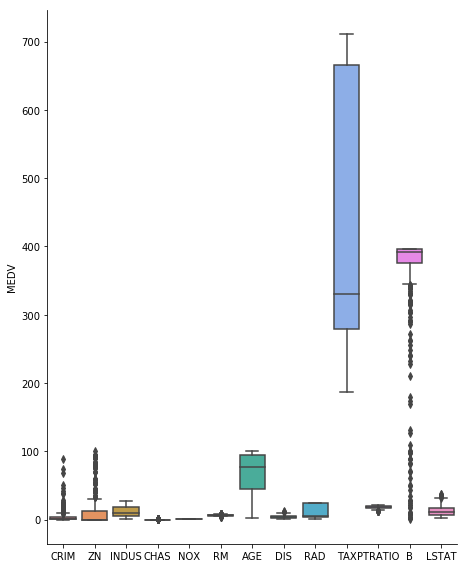

In [3]:
sns.factorplot(kind ='box',data =data,size=8, aspect=.8)
plt.ylabel("MEDV")

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler,RobustScaler
scaler = StandardScaler()
rbs_scaler =RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_rbs   = rbs_scaler.fit_transform(X_train)
X_test_rbs   = rbs_scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV,Ridge
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7178904694734618, 0.1269544725091708)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores = cross_val_score(RidgeCV(), X_train_rbs, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.71742404530709136, 0.12571129357124472)

### Pipelines

In [8]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.63448846877867426

In [9]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(RobustScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.6320816497200723

### Transformations - Box Cox Transformation using scipy

In [10]:
def dist_plots(dataset,continuous_features):
    fig = plt.figure(figsize=(12, 8),dpi=300)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(4,4, i+1)
        sns.distplot(dataset[dataset[continuous_features[i]].notnull()][continuous_features[i]],ax=ax ,
                     kde =False,hist_kws=dict(alpha=1))
        sns.despine()
    plt.tight_layout()
    plt.show()

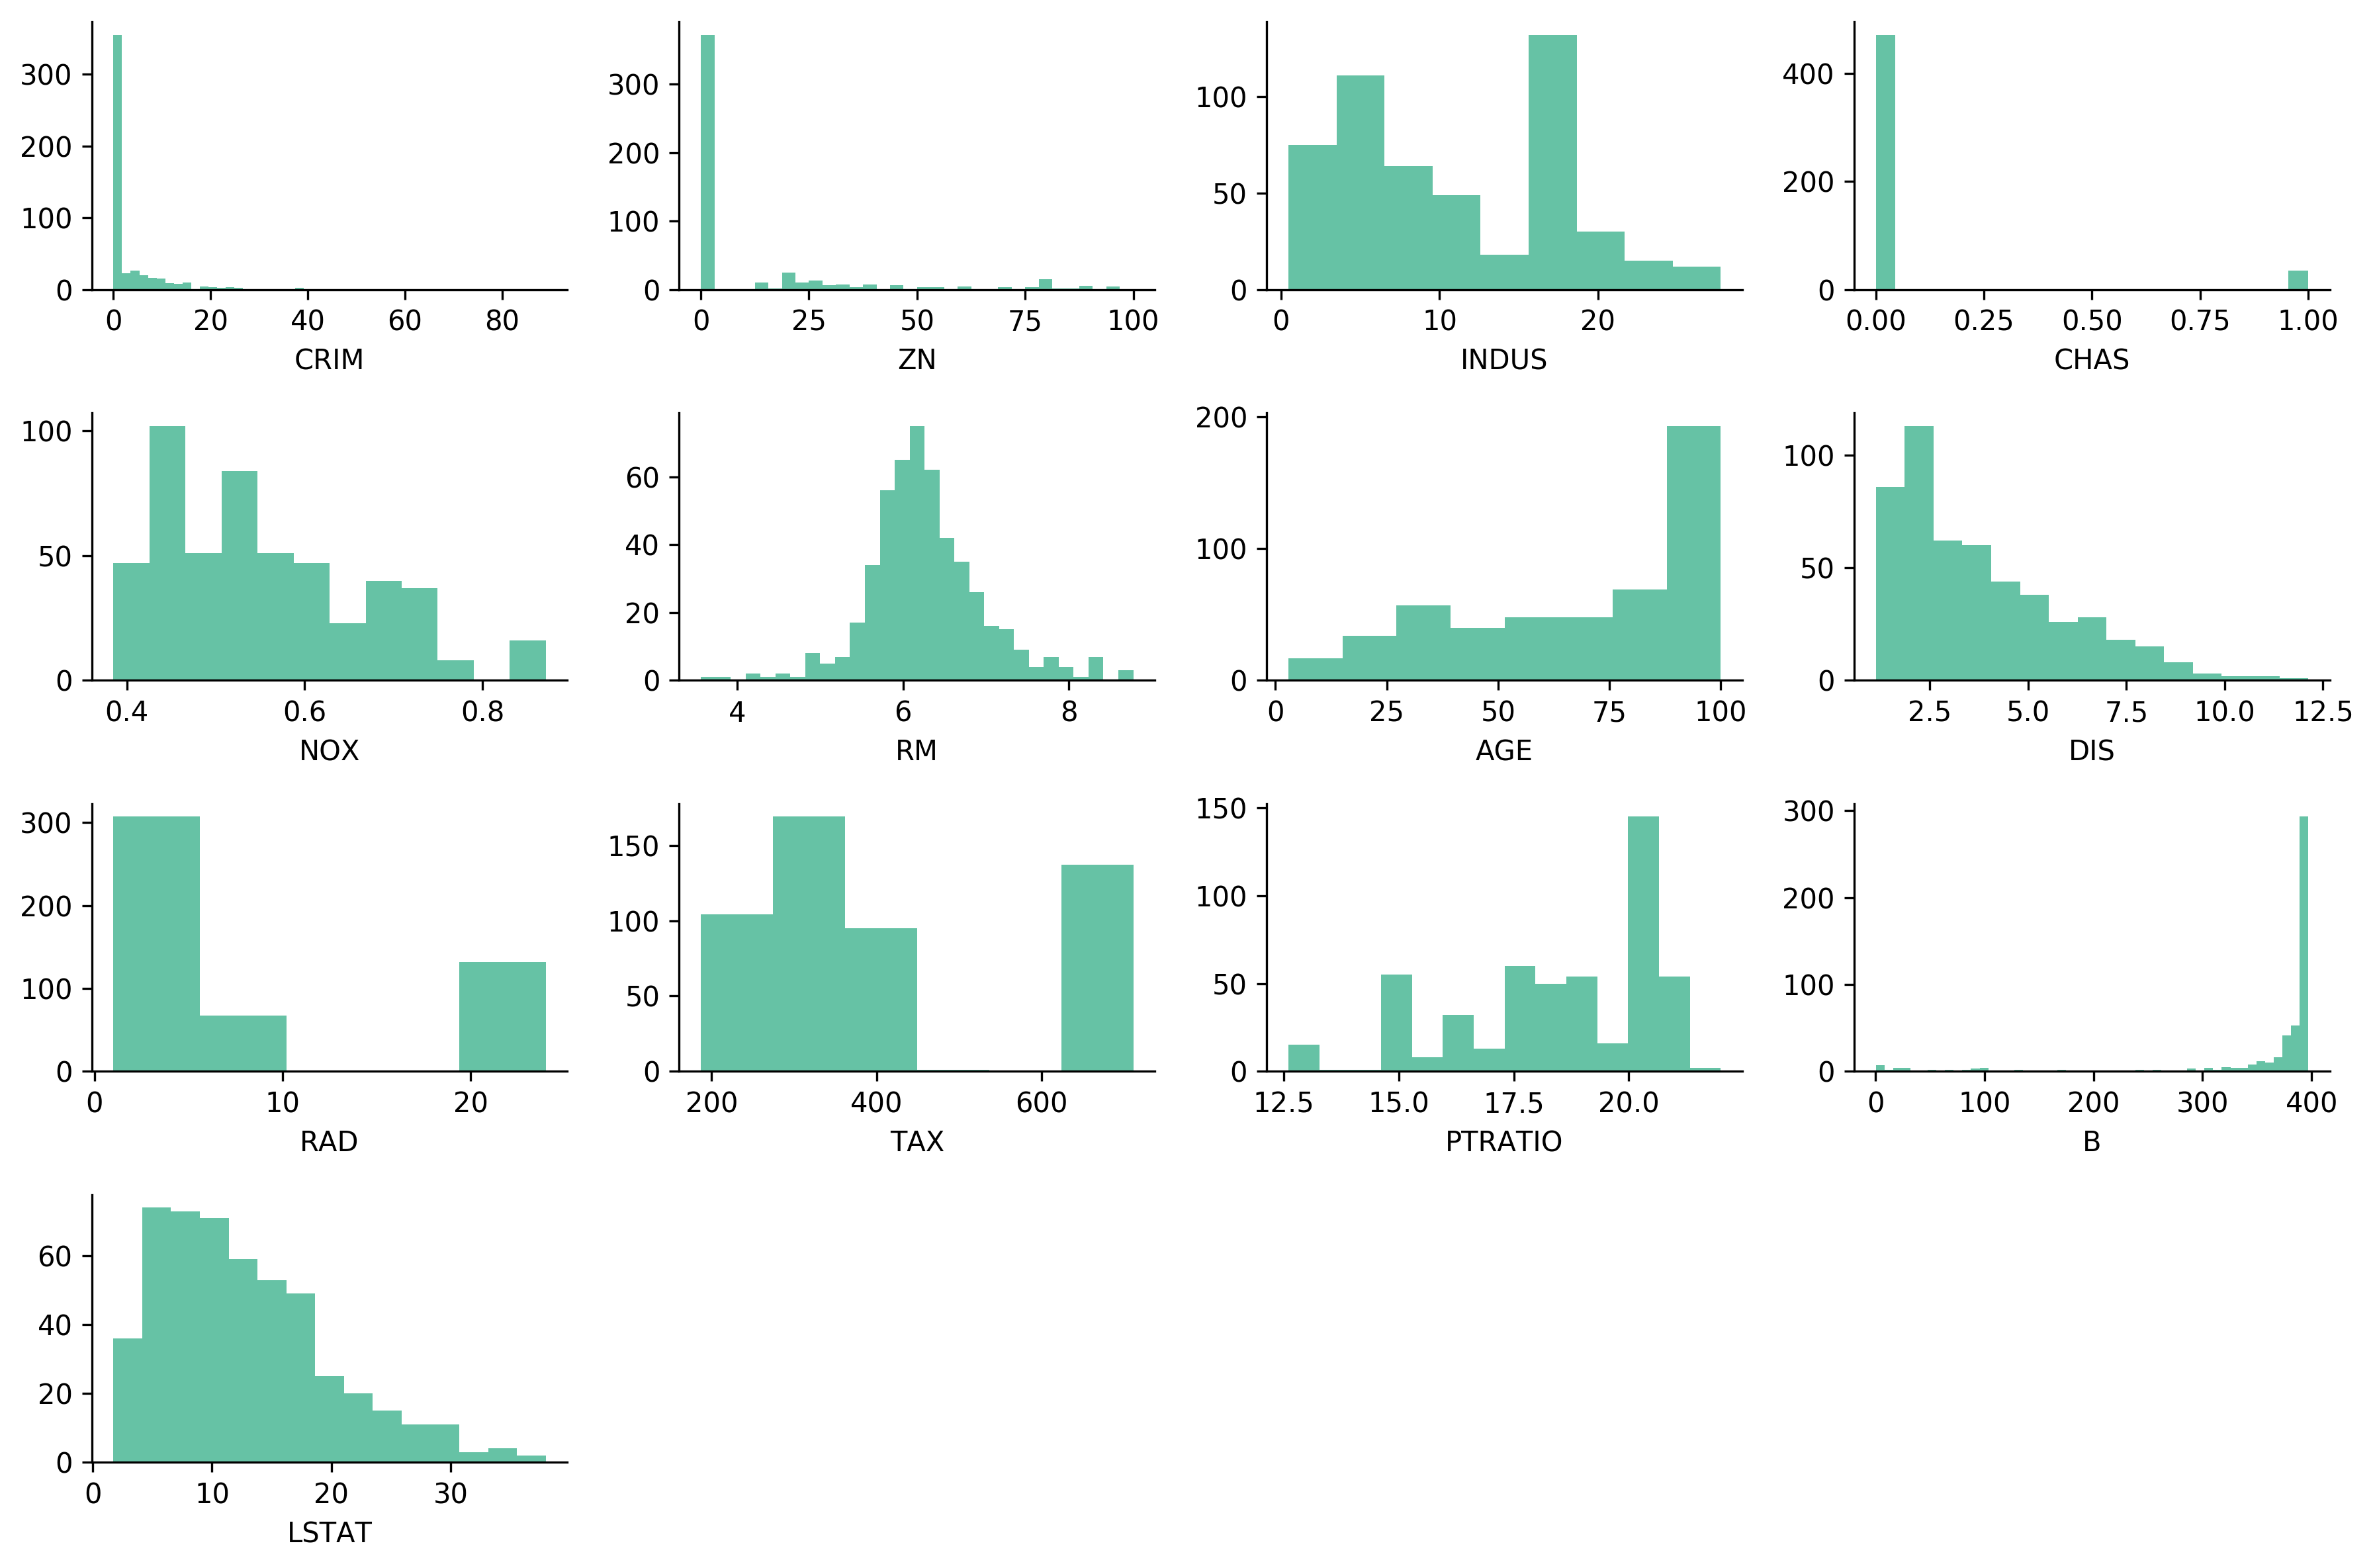

In [11]:
from scipy.stats  import boxcox
dist_plots(data,list(data.columns))

In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.594,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.597,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.647,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


In [13]:
bc_CRIM,lambda_CRIM  = boxcox(data['CRIM'])
bc_ZN,lambda_ZN  = boxcox(data['ZN']+1)
bc_INDUS,lambda_INDUS = boxcox(data['INDUS'])
bc_CHAS,lambda_CHAS  = boxcox(data['CHAS']+1)
bc_NOX,lambda_NOX = boxcox(data['NOX'])
bc_RM,lambda_RM  = boxcox(data['RM'])
bc_AGE,lambda_AGE  = boxcox(data['AGE'])
bc_DIS,lambda_DIS  = boxcox(data['DIS'])
bc_RAD,lambda_RAD  = boxcox(data['RAD'])
bc_TAX,lambda_TAX  = boxcox(data['TAX'])
bc_PTRATIO,lambda_PTRATIO  = boxcox(data['PTRATIO'])
bc_B,lambda_B = boxcox(data['B'])
bc_LSTAT,lambda_LSTAT  = boxcox(data['LSTAT'])

data['BC_CRIM'] = bc_CRIM
data['BC_ZN']   = bc_ZN
data['BC_INDUS'] = bc_INDUS
data['BC_CHAS']   = bc_CHAS
data['BC_NOX'] =bc_NOX
data['BC_RM'] =bc_RM
data['BC_AGE'] =bc_AGE
data['BC_DIS'] =bc_DIS
data['BC_RAD'] =bc_RAD
data['BC_TAX'] =bc_TAX
data['BC_PTRATIO'] =bc_PTRATIO
data['BC_B'] =bc_B
data['BC_LSTAT'] =bc_LSTAT

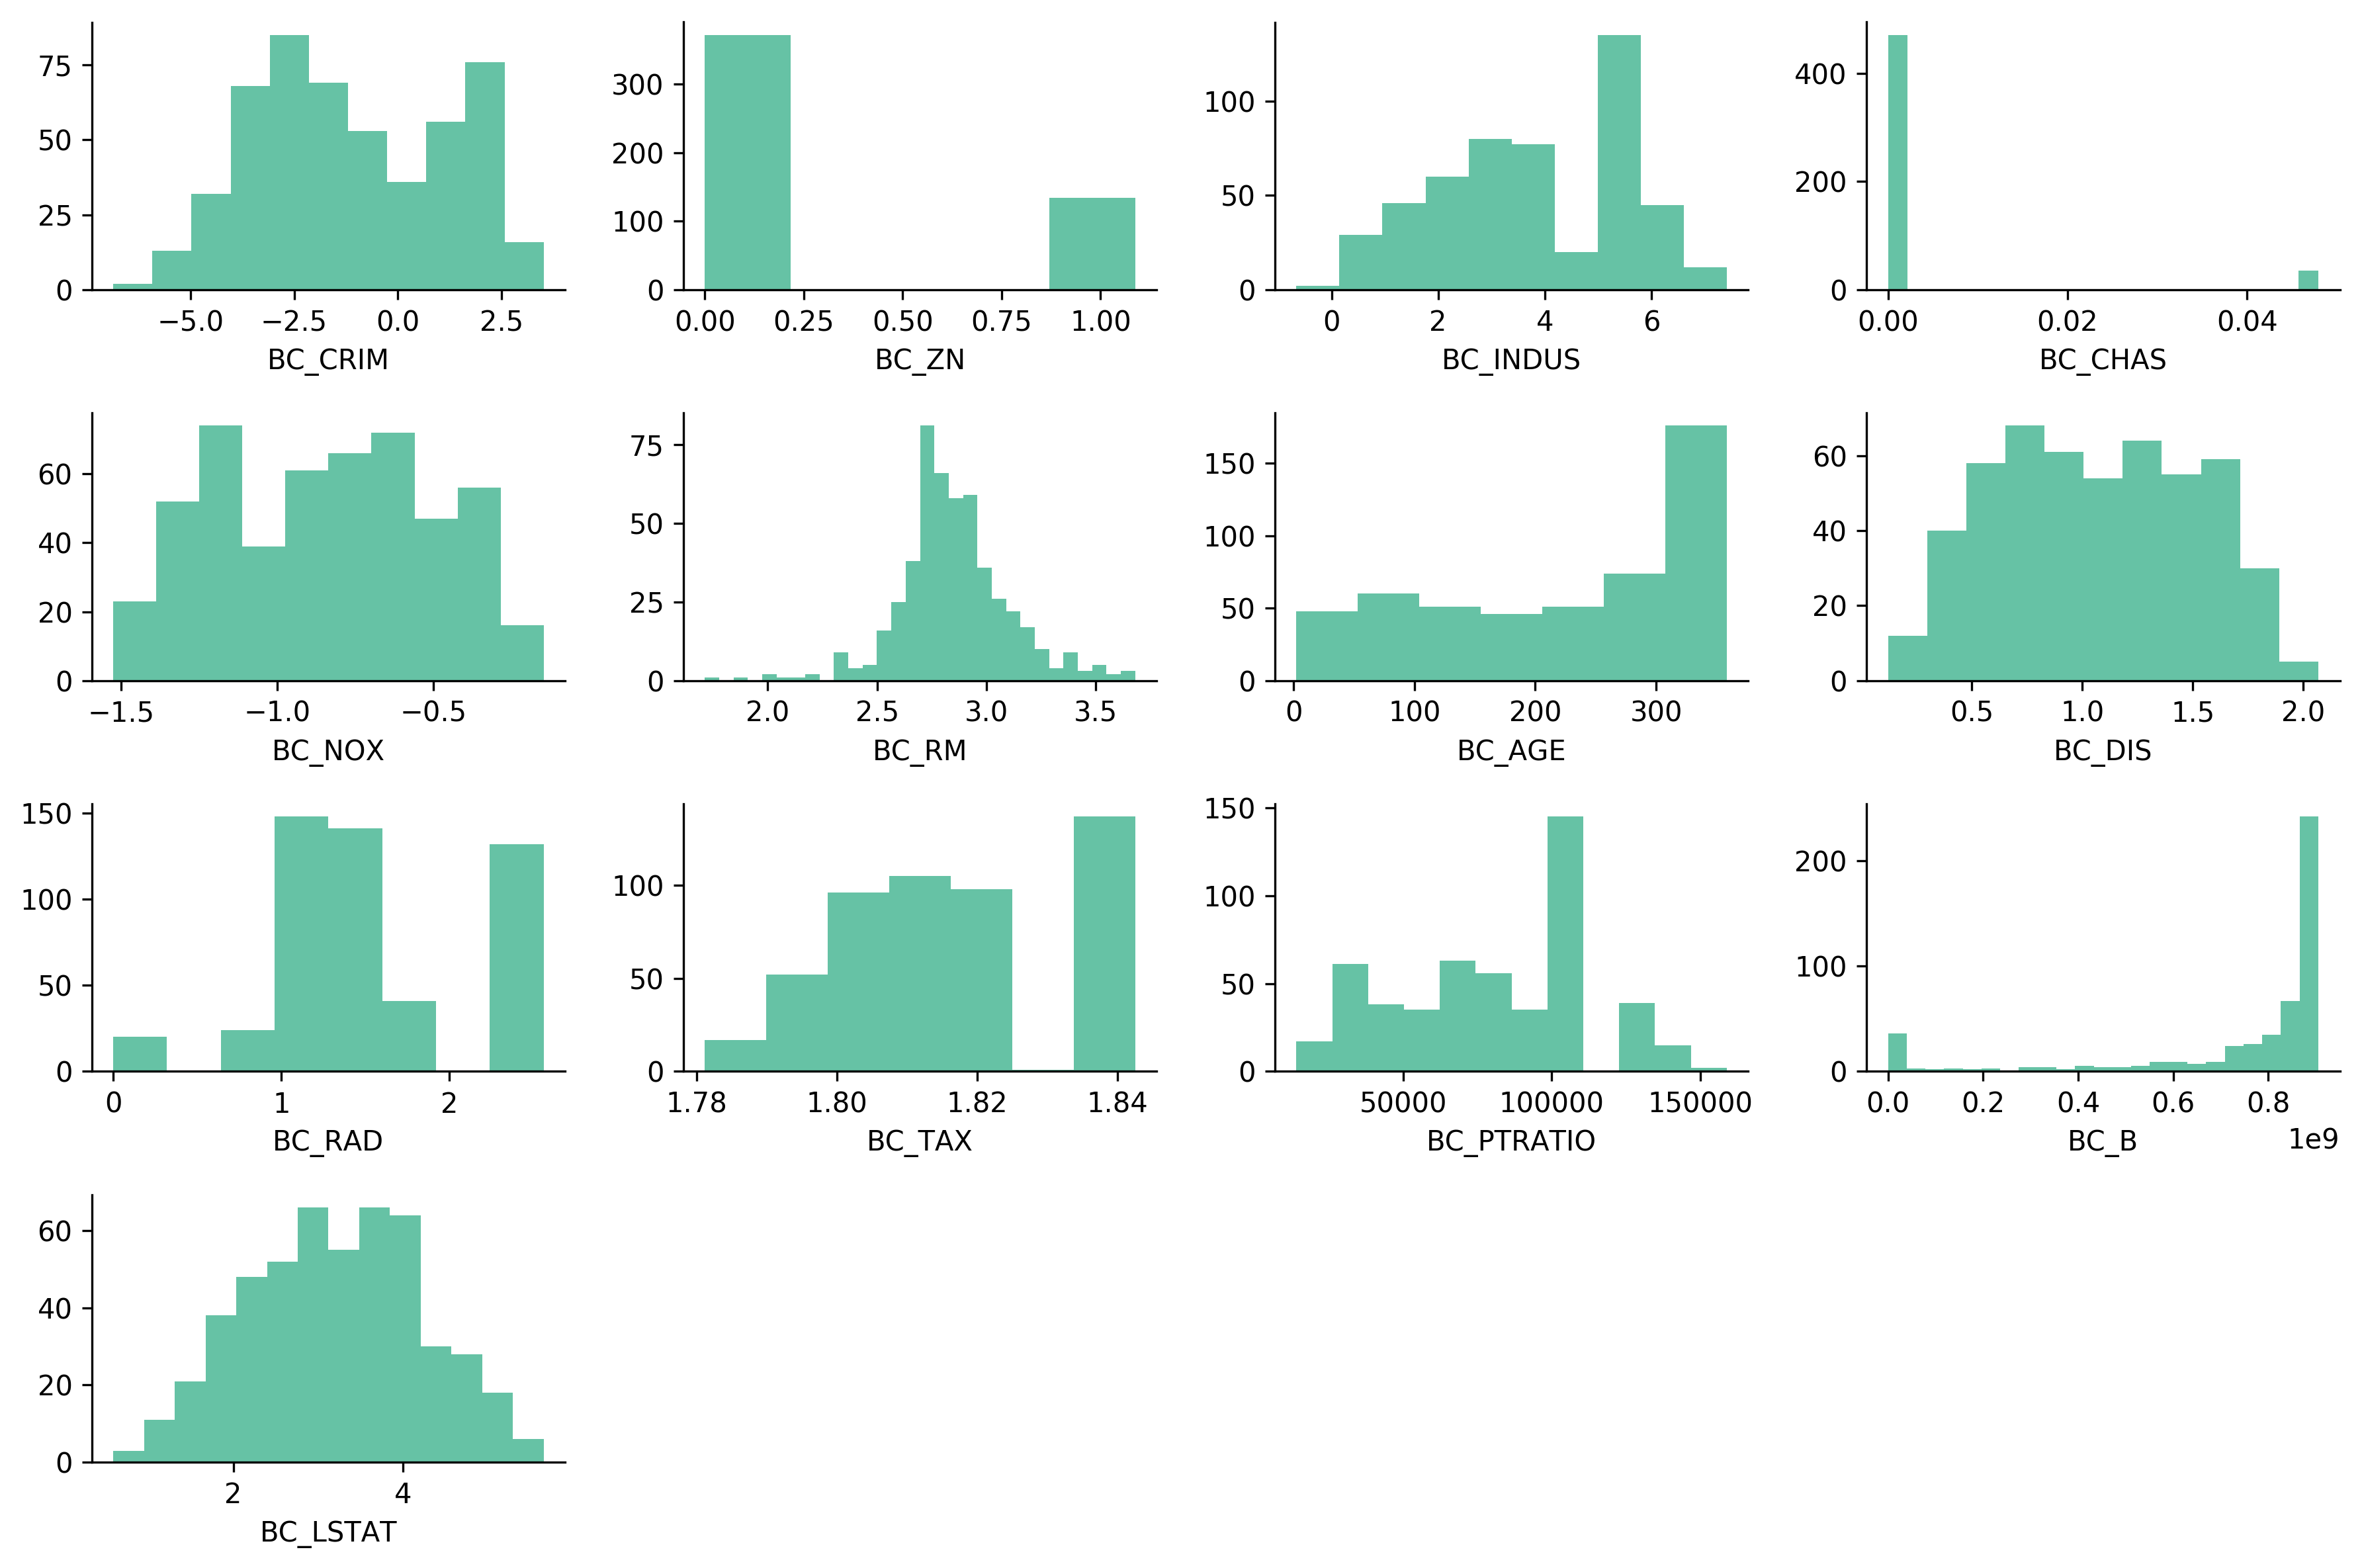

In [14]:
bc_features = [feature for feature  in list(data.columns) if feature.startswith('BC_') ]
dist_plots(data,bc_features)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[bc_features], target, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_train_rbs   = rbs_scaler.fit_transform(X_train)
X_test_rbs   = rbs_scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.74882644566461076, 0.080877185674815777)

In [16]:
scores = cross_val_score(RidgeCV(), X_train_rbs, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.75190379477847735, 0.075794590640289233)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_train_rbs_poly = poly.fit_transform(X_train_rbs)
print(X_train_rbs.shape)
print(X_train_rbs_poly.shape)

(379, 13)
(379, 105)


In [18]:
scores = cross_val_score(RidgeCV(), X_train_rbs_poly, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.87372957794693185, 0.097992331601880353)

In [19]:
from sklearn.model_selection import GridSearchCV

def create_grid_fit(X,y,model,params):
    grid = GridSearchCV(model,params, cv=10, return_train_score=True, iid=False)
    grid.fit(X,y)
    return grid



In [20]:
def plot_results(results,param):
    param ='param_'+ param
    fig = plt.figure(figsize=(5, 3),dpi=100)
    results.plot(param, 'mean_train_score',ax=fig.gca())
    results.plot(param, 'mean_test_score', ax=fig.gca())
    plt.fill_between(results[param].astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
    plt.fill_between(results[param].astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
    plt.legend()
    plt.xscale("log")
    


In [21]:
def print_model_details(model,results,param):
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:")
    print(model.best_estimator_)
    print(model.best_params_)
    print(model.best_score_)
    #print((model.best_estimator_.coef_!= 0).sum())
    plot_results(results,param)



###  GridSearch with Pipelines


Best score: 0.754
Best parameters set:
Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])
{'ridge__alpha': 10.0}
0.753711225326


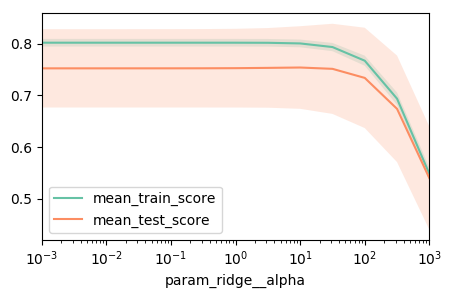

In [22]:
### with Standard scaling
param ='ridge__alpha'
param_grid = {param :np.logspace(-3,3,13)}
pipe = make_pipeline(StandardScaler(), Ridge())
ridge_grid = create_grid_fit(X_train,y_train,pipe,param_grid)
results = pd.DataFrame(ridge_grid.cv_results_)
print_model_details(ridge_grid,results,param)
 

Best score: 0.754
Best parameters set:
Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=3.1622776601683795, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])
{'ridge__alpha': 3.1622776601683795}
0.75406898691


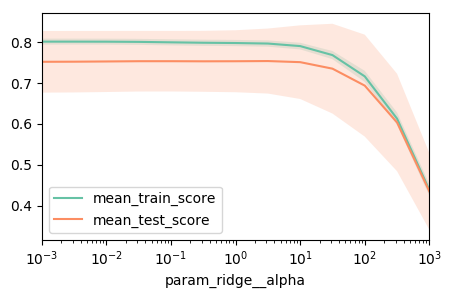

In [23]:
### with Robust scaling
pipe = make_pipeline(RobustScaler(), Ridge())
ridge_grid = create_grid_fit(X_train,y_train,pipe,param_grid)
results = pd.DataFrame(ridge_grid.cv_results_)
print_model_details(ridge_grid,results,param)

Best score: 0.873
Best parameters set:
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=0.031622776601683791, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])
{'ridge__alpha': 0.031622776601683791}
0.872719699559


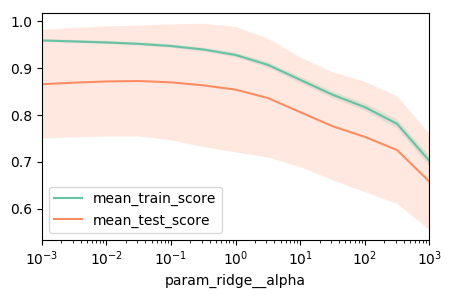

In [24]:
pipe = make_pipeline(PolynomialFeatures(),RobustScaler(), Ridge())
ridge_grid = create_grid_fit(X_train,y_train,pipe,param_grid)
results = pd.DataFrame(ridge_grid.cv_results_)
print_model_details(ridge_grid,results,param)

In [25]:
model = ridge_grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test) 

0.74864923459033628